In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

from scipy import stats
from tqdm import tqdm

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [3]:
PATH = r'C:\Users\JY\JYC\Projects\parkingLot\data'

rawtrain = pd.read_csv(PATH + '\\train.csv')
rawtest = pd.read_csv(PATH + '\\test.csv')
age_gender = pd.read_csv(PATH + '\\age_gender_info.csv', index_col=0)
sample_submission = pd.read_csv(PATH + '\\sample_submission.csv')
car_count = pd.read_csv(PATH + '\\car_count.csv', index_col = 0)

###   
### 지역정보 join (운전가능연령: 20~70대)

In [4]:
female = []
male = []
for col in age_gender.columns:
    female.append(col) if '여자' in col else male.append(col)
        
female_ratio = pd.DataFrame(age_gender[female].iloc[:, 2:8].sum(axis=1), columns=['여자운전비율'])
male_ratio = pd.DataFrame(age_gender[male].iloc[:, 2:8].sum(axis=1), columns=['남자운전비율'])

rawtrain = pd.merge(rawtrain, female_ratio, on='지역')
rawtrain = pd.merge(rawtrain, male_ratio, on='지역')
rawtest = pd.merge(rawtest, female_ratio, on='지역')
rawtest = pd.merge(rawtest, male_ratio, on='지역')

###
### age_gender_info 분석
### 1. 서울특별시, 부산광역시 / 세종특별자치시 / 나머지로 크게 분류할 수 있음
### 2. 가구 별 보유 대수 = 연령별 1인당 평균 보유대수 * 가구별 연령 구성비율
### 3. 연령별 1인당 평균 보유대수 = 연령별 보유대수 / 연령대 인구


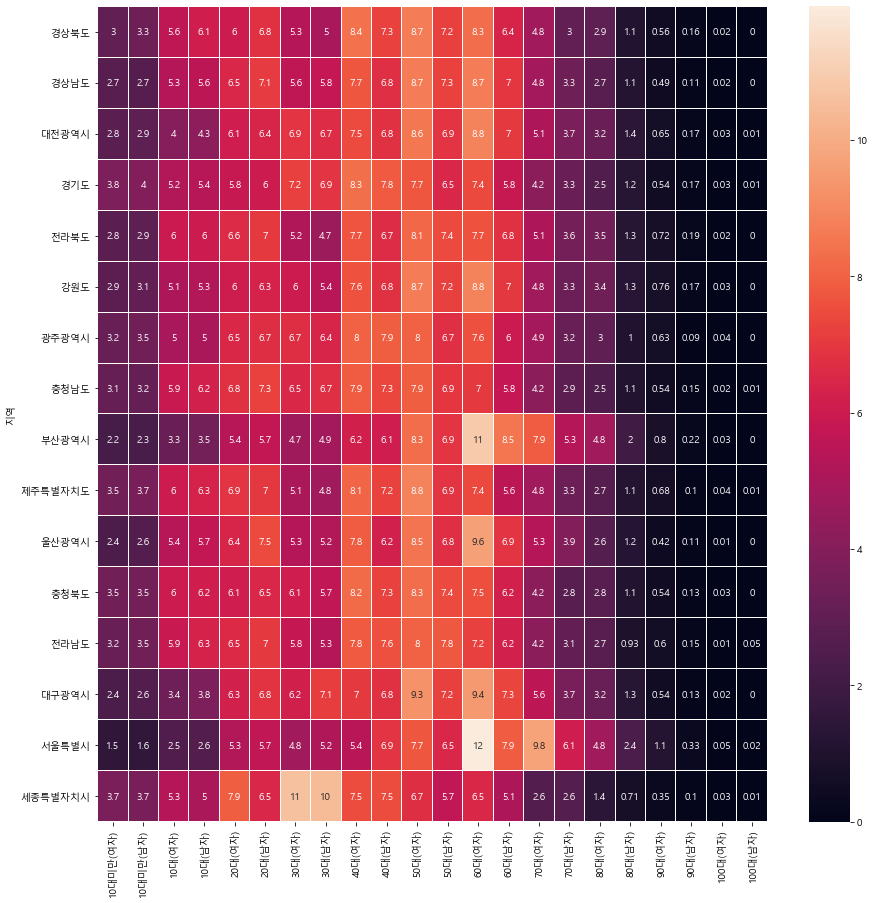

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap((age_gender*100).round(2), annot=True, linewidths = 0.01)

plt.show()

In [52]:
mul

,100대(남자),100대(여자),10대(남자),10대(여자),10대미만(남자),10대미만(여자),20대(남자),20대(여자),30대(남자),30대(여자),40대(남자),40대(여자),50대(남자),50대(여자),60대(남자),60대(여자),70대(남자),70대(여자),80대(남자),80대(여자),90대(남자),90대(여자)
지역,,,,,,,,,,,,,,,,,,,,,,
경상북도,0.0,0.0,0.000096,0.000062,0.0,0.0,0.008830,0.005451,0.036720,0.017918,0.081446,0.035910,0.092124,0.040363,0.082392,0.028137,0.026358,0.005388,0.004058,0.001033,0.000458,0.000238
경상남도,0.0,0.0,0.000187,0.000096,0.0,0.0,0.008334,0.004898,0.040558,0.017555,0.070714,0.030880,0.083949,0.037748,0.080570,0.028129,0.025166,0.005145,0.003463,0.001013,0.000314,0.000247
대전광역시,0.0,0.0,0.000159,0.000086,0.0,0.0,0.007033,0.004191,0.044587,0.021265,0.066073,0.029612,0.074496,0.036738,0.074649,0.028367,0.025029,0.006196,0.004364,0.001731,0.000490,0.000499
경기도,0.0,0.0,0.000170,0.000083,0.0,0.0,0.006145,0.003358,0.044082,0.019111,0.074392,0.029640,0.064830,0.030835,0.057344,0.023584,0.020314,0.005475,0.003856,0.001246,0.000475,0.000327
전라북도,0.0,0.0,0.000198,0.000102,0.0,0.0,0.008931,0.005675,0.032686,0.018686,0.069880,0.033158,0.088314,0.039312,0.079783,0.026826,0.026399,0.005843,0.004205,0.001740,0.000586,0.000539
강원도,0.0,0.0,0.000136,0.000084,0.0,0.0,0.009138,0.005429,0.040263,0.021053,0.071310,0.034212,0.083102,0.042288,0.079393,0.031824,0.025741,0.006179,0.005022,0.001297,0.000445,0.000463
광주광역시,0.0,0.0,0.000096,0.000050,0.0,0.0,0.007781,0.005281,0.044007,0.023533,0.078776,0.033523,0.075585,0.036344,0.062879,0.024542,0.020276,0.005584,0.003113,0.001445,0.000270,0.000464
충청남도,0.0,0.0,0.000166,0.000093,0.0,0.0,0.011203,0.006674,0.052829,0.022444,0.083243,0.034180,0.084807,0.038977,0.069836,0.025311,0.022045,0.004906,0.003371,0.000947,0.000387,0.000260
부산광역시,0.0,0.0,0.000115,0.000061,0.0,0.0,0.004699,0.002300,0.027381,0.010579,0.050281,0.019253,0.057236,0.025427,0.067589,0.023377,0.026961,0.006544,0.004858,0.001676,0.000726,0.000376


In [50]:
mul.sum(axis = 1)

지역
경상북도       0.466983
경상남도       0.438965
대전광역시      0.425566
경기도        0.385267
전라북도       0.442863
강원도        0.457377
광주광역시      0.423550
충청남도       0.461678
부산광역시      0.329439
제주특별자치도    0.463453
울산광역시      0.428715
충청북도       0.455446
전라남도       0.452771
대구광역시      0.438346
서울특별시      0.291877
세종특별자치시    0.473917
dtype: float64

In [56]:
rawtrain[rawtrain['임대보증금'] == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2475,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43,H,-,-,0.0,4,1670,1153
2476,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43,H,-,-,0.0,4,1670,1153
2477,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43,H,-,-,0.0,4,1670,1153
2478,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43,H,-,-,0.0,4,1670,1153
2479,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43,H,-,-,0.0,4,1670,1153
2608,C1786,480,아파트,강원도,행복주택,16.91,156,25,K,-,-,0.0,3,338,345
2609,C1786,480,아파트,강원도,행복주택,26.90,136,25,K,-,-,0.0,3,338,345
2610,C1786,480,아파트,강원도,행복주택,26.90,72,25,K,-,-,0.0,3,338,345
2611,C1786,480,아파트,강원도,행복주택,26.90,24,25,K,-,-,0.0,3,338,345
2823,C2186,924,아파트,대구광역시,국민임대,29.17,238,0,H,-,-,0.0,8,664,744


###  
### 오류 단지코드 제외
### 1. 전용면적별 세대수 합계와 총세대수 일치 x: 전용면적별 세대수 합계를 총 세대수로 설정하고 진행
### 2. 동일한 단지에 단지코드가 2개로 부여된 경우: train(2085, 1397, 2431, 1649, 1036), test(2675) 

In [5]:
def exception():
    # 1. 전용면적별 세대수 합계 join
    _t1 = rawtrain.groupby('단지코드').sum()['전용면적별세대수']
    _t2 = pd.merge(rawtrain, _t1, on='단지코드')
    _t2['전용면적별세대수'] = _t2['전용면적별세대수_x']
    _t2['총세대수'] = _t2['전용면적별세대수_y']
    _final1 = _t2.drop(['전용면적별세대수_x', '전용면적별세대수_y'], axis='columns')
    
    # 2. 제외할 코드들 제외
    train = _final1[~_final1['단지코드'].isin(['C2085', 'C1397', 'C2431', 'C1649', 'C1036', 'C1095', 
                                             'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'])]
    test = rawtest[~rawtest['단지코드'].isin(['C2675', 'C2335', 'C1327'])]
    
    return train, test

In [6]:
train, test = exception()

###  
### 결측치 처리

In [7]:
def nanprocess_v1(usetrain):

    """
        도보 10분거리내 지하철역 수: "지역별로" 결측치 제외 평균 0.5 미만이면 0, 이상이면 1 부여
        cf. 대전과 충청남도에만 결측치 있음    
        
    """
    cities = list(set(usetrain['지역']))
    aparts = list(set(usetrain['단지코드']))
    _pre1 = usetrain.copy()
    
    _col = '도보 10분거리 내 지하철역 수(환승노선 수 반영)'
    for city in tqdm(cities):
        _aparts_in_city = usetrain[usetrain['지역'] == city]
        _codes_in_city = list(set(_aparts_in_city['단지코드']))
        
        _mean = np.nanmean(_aparts_in_city[_col])
        for code in _codes_in_city:
            _idx = _pre1[_pre1['단지코드']==code].index
            if usetrain[usetrain['단지코드'].isin(_codes_in_city)][_col].isnull().sum() > 0:
                if _mean >= 0.5:
                    _pre1.loc[_idx, _col] = 1
                else:
                    _pre1.loc[_idx, _col] = 0
                    
    """
        임대보증금 및 임대료: 결측치 제외하고, 단지별로, 전용면적과 선형회귀분석 진행하여 결측치 처리
        cf. 임대보증금, 임대료에 '-' 값 있음: 결측치로 처리 
        cf. C2152 아파트의 경우 임대보증금/임대료 데이터가 아예 결측 -> 강원도평균으로 처리
        
    """        
    # 임대가치 지표 신규 설정
    _pre2 = _pre1.copy()
    _col = ['임대보증금', '임대료']

    for col in _col:
        _pre2 = _pre2.drop(_pre2[_pre2[col] == '-'].index)
        _pre2[col] = _pre2[col].astype(float)
    _pre2['임대가치'] = _pre2['임대보증금'] * _pre2['임대료']
    
    
#     # 이상치 제거, 선형회귀식 작성에 사용할 데이터 추출
#     q1 = _pre1['임대가치'].quantile(0.25)
#     q3 = _pre1['임대가치'].quantile(0.75)
#     IQR = q3 - q1
#     _lin = _pre1[(_pre1['임대가치'] < (q1 - 1.5 * IQR)) | (_pre1['임대가치'] > (q3 + 1.5 * IQR))]
    
#     # 선형회귀식 작성
#     cities = list(set(_pre1['지역']))
#     aparts = list(set(_pre1['단지코드']))
    
#     for apart in tqdm(aparts):
#         _dat1 = _lin[_lin['단지코드'] == apart]
#         linmodel = stats.linregress(list(_lin['전용면적'].astype(float)), list(_lin['임대가치'].astype(float)))
#         _idx1 = _pre1[_pre1['단지코드'] == apart].isnull().index
#         for idx in _idx1:
#             _pre1.loc[idx, '임대가치'] = linmodel.intercept + linmodel.slope * _pre1.loc[idx, '전용면적']
    
#     final = _pre1[(_pre1['임대가치'] >= (q1 - 1.5 * IQR)) & (_pre1['임대가치'] <= (q3 + 1.5 * IQR))]
    
    return _pre1, _pre2
    
    

In [8]:
_, prep_train = nanprocess_v1(train)
_forC2152, prep_test = nanprocess_v1(test)

# 강원도 임대가치 평균으로 C2152 결측치 처리
_forC2152['임대가치'] = np.mean(prep_test[prep_test['지역']=='강원도']['임대가치'])
prep_test = pd.concat([prep_test, _forC2152[_forC2152['단지코드'] == 'C2152']])

# 테스트 결측데이터 처리
prep_test.loc[400, '자격유형'] = 'A'
prep_test.loc[599, '자격유형'] = 'C'

prep = pd.concat([prep_train, prep_test])

100%|██████████| 15/15 [00:00<00:00, 98.74it/s]


###  
### string 데이터 처리 / 상가 데이터 처리   (one-hot enc)

In [9]:
# 지역
local_map = {}
for i, loc in enumerate(prep['지역'].unique()):
    _arr = [0] * len(prep['지역'].unique())
    _arr[i] = 1
    local_map[loc] = _arr
    
# 공급유형
supply_map = {}
for i, loc in enumerate(prep['공급유형'].unique()):
    _arr = [0] * len(prep['공급유형'].unique())
    _arr[i] = 1
    supply_map[loc] = _arr
    
# 자격유형
qual_map = {}
for i, loc in enumerate(prep['자격유형'].unique()):
    _arr = [0] * len(prep['자격유형'].unique())
    _arr[i] = 1
    qual_map[loc] = _arr


In [10]:
def preprocess_v1(prep, type='train'):
    aparts = list(set(prep['단지코드']))
    merge_set = []
    for code in tqdm(aparts):
        final_vector = {}

        usedat = prep[prep['단지코드'] == code]
        onlyapart = usedat[usedat['임대건물구분'] == '아파트']
        
        if '상가' in set(usedat['임대건물구분']):
            sanga = 1
            sangadat = usedat[usedat['임대건물구분'] == '상가']
            apartdat = usedat[usedat['임대건물구분'] == '아파트']
            sanga_area = sum(sangadat['전용면적'] * sangadat['전용면적별세대수'])
            apart_area = sum(apartdat['전용면적'] * apartdat['전용면적별세대수'])
        else:
            sanga = 0
            sanga_area = 0.0
            apart_area = sum(usedat['전용면적'] * usedat['전용면적별세대수'])
        
        final_vector['단지코드'] = [usedat['단지코드'].iloc[0]]
        final_vector['총세대수'] = [usedat['총세대수'].iloc[0]]
        final_vector['상가'] = [sanga]
        final_vector['아파트면적'] = [apart_area]
        final_vector['상가면적'] = [sanga_area]
        
        _onehot = sum([np.array(local_map[key]) for key in usedat['지역'].unique()])    # 지역정보
        for tp in zip(list(local_map.keys()), list(_onehot)):
            final_vector[tp[0]] = tp[1]
            
        _onehot = sum([np.array(supply_map[key]) * usedat.iloc[idx]['전용면적별세대수'] for idx, key in enumerate(usedat['공급유형'])])    # 공급유형
        for tp in zip(supply_map.keys(), _onehot):
            final_vector[tp[0]] = tp[1]
            
        _onehot = sum([np.array(qual_map[key]) * usedat.iloc[idx]['전용면적별세대수'] for idx, key in enumerate(usedat['자격유형'])])    # 자격유형
        for tp in zip(qual_map.keys(), _onehot):
            final_vector[tp[0]] = tp[1]     

        final_vector['공가수'] = [usedat['공가수'].iloc[0]]            
        final_vector['임대가치'] = [usedat['임대가치'].iloc[0]]
        final_vector['지하철'] = [usedat['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].iloc[0]]
        final_vector['버스'] = [usedat['도보 10분거리 내 버스정류장 수'].iloc[0]]
        final_vector['주차면수'] = [usedat['단지내주차면수'].iloc[0]]
        if type == 'train':
            final_vector['등록차량수'] = [usedat['등록차량수'].iloc[0]]
        
        del final_vector['공공분양']
        
        merge_set.append(pd.DataFrame(final_vector))
    
    return pd.concat(merge_set)

finaltrain = preprocess_v1(prep_train).dropna()
finaltest = preprocess_v1(prep_test, 'test')

100%|██████████| 147/147 [00:00<00:00, 153.21it/s]


In [11]:
finaltrain.head()

,단지코드,총세대수,상가,아파트면적,상가면적,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시,국민임대,공공임대(10년),행복주택,영구임대,임대상가,공공임대(50년),공공임대(분납),공공임대(5년),A,E,H,J,C,D,I,L,K,B,G,N,M,O,F,공가수,임대가치,지하철,버스,주차면수,등록차량수
0,C1027,452,0,18234.44,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,452,0,0,0,0,0,0,0,452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,2.310611e+12,0.0,5.0,461.0,207.0
0,C1171,624,0,25662.09,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,624,0,0,0,0,0,0,0,624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,2.095509e+12,1.0,5.0,634.0,700.0
0,C1000,566,0,23871.18,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,566,0,0,0,0,0,0,0,566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,1.037412e+12,0.0,1.0,438.0,481.0
0,C1476,453,1,12524.94,232.66,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,447,6,0,0,0,0,0,0,0,447,6,0,0,0,0,0,0,0,0,0,6.0,1.001986e+12,0.0,5.0,107.0,70.0
0,C1320,1696,0,57692.80,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1696,0,0,0,0,0,0,0,0,0,1696,0,0,0,0,0,0,0,0,0,0,0,0,35.0,1.211980e+12,0.0,4.0,1648.0,924.0


In [17]:
# print(finaltrain.isnull().sum())
# print(finaltest.isnull().sum())

In [36]:
finaltrain[finaltrain['임대가치']<5e12].shape
# finaltrain = finaltrain[finaltrain['임대가치']<5e12]

(357, 52)

In [24]:
# for i in finaltrain.columns.difference(['단지코드']):
#     print(i)
#     plt.hist(finaltrain[i])
#     plt.show()

###  
### Normalization

In [12]:
means = {}
stds = {}
for col in finaltrain.columns.difference(['단지코드']):
    means[col] = np.mean(finaltrain[col])
    stds[col] = np.std(finaltrain[col])
    finaltrain[col] = (finaltrain[col] - means[col]) / stds[col]
    
for col in finaltest.columns.difference(['단지코드']):
    finaltest[col] = (finaltest[col] - means[col]) / stds[col]

In [19]:
# for i in finaltrain.columns.difference(['단지코드']):
#     print(i)
#     plt.hist(finaltrain[i])
#     plt.show()

###  
### 학습 시작

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE

import time

In [14]:
train_validation = {}
except_val = []

tmp_finaltrain = np.array(finaltrain[finaltrain.columns.difference(except_val)])
np.random.seed(777)
np.random.shuffle(np.array(tmp_finaltrain))
thres = int(tmp_finaltrain.shape[0] / 5)

x_train = pd.DataFrame(tmp_finaltrain[:-thres], columns=finaltrain.columns.difference(except_val))
x_validation = pd.DataFrame(tmp_finaltrain[-thres:], columns=finaltrain.columns.difference(except_val))

X = x_train[x_train.columns.difference(['등록차량수', '단지코드'])].astype(float)
y = x_train[['등록차량수']].astype(float)

def myLR():
    model = LinearRegression()
    fit = model.fit(X, y)
    print(f'Linear Regression Score: {MAE(y, fit.predict(X))}')

In [15]:
def myRegressor(regressor, param_grid):
    start = time.time()
    reg_grid = GridSearchCV(estimator=regressor,
                            param_grid=param_grid,
                            scoring='neg_mean_absolute_error',
                            n_jobs=60,
                            cv=5,
                            refit=True,
                            return_train_score=True)
    reg_grid.fit(X, y)
    result = pd.DataFrame(reg_grid.cv_results_)[
        ['params', 'mean_test_score', 'rank_test_score']
    ].sort_values(by='rank_test_score')
    print(f'소요시간: {round((time.time() - start) / 60, 2)}분')
    
    return result

In [16]:
def finalxgb(n_jobs, params):
    start = time.time()
    x_train, y_train = X.copy(), y.copy()
    xgb_clf = xgb.XGBRegressor()
    xgb_param_grid  = {
        'learning_rate': params['learning_rate'],
        'n_estimators': params['n_estimators'],
        'max_depth': [5],
        'min_child_weight': [1],
        'gamma': [0],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'nthread': [-1],
        'scale_pos_weight': [1],
        'tree_method': ['gpu_hist'],
        'gpu_id': params['gpu_id'],
        'seed': [123]
    }

    def GridXGB(xgb_clf, xgb_param_grid):
        hr_grid = GridSearchCV(estimator=xgb_clf,
                           param_grid=xgb_param_grid,
                           scoring='neg_mean_absolute_error',
                           n_jobs=n_jobs,
                           cv=5,
                           refit=True,
                           return_train_score=True)
        hr_grid.fit(x_train, y_train)
        return hr_grid

    hr_grid = GridXGB(xgb_clf, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'Learning Rate, n_estimators FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)

    xgb_param_grid  = {
        'max_depth': params['max_depth'],
        'min_child_weight': [1, 2, 3, 4, 5]
    }

    hr_grid = GridXGB(s1, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'max_depth, min_child_weight FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)

    xgb_param_grid  = {
        'gamma': params['gamma']
    }

    hr_grid = GridXGB(s1, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'gamma FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)


    xgb_param_grid  = {
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }

    hr_grid = GridXGB(s1, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'subsample, colsample_bytree FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)


    xgb_param_grid  = {
        'subsample': [i/100.0 for i in range(40,80)],
    }

    hr_grid = GridXGB(s1, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'subsample FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)

    xgb_param_grid = {
     'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
    }

    hr_grid = GridXGB(s1, xgb_param_grid)
    hr_grid_df = pd.DataFrame(hr_grid.cv_results_).sort_values(by='rank_test_score')
    print(f'Best MAE: {hr_grid_df.iloc[0]["mean_test_score"]}')

    s1 = xgb_clf
    s1.set_params(**hr_grid.best_params_)
    print(f'Regularization FINISHED !! Time Spent: {round((time.time() - start) / 60, 2)} mins')
    print(hr_grid.best_params_)

    return hr_grid



In [17]:
rf_params = {
    'n_estimators': [10, 20, 30, 40, 50],
    'criterion': ['mae'],
    'max_depth': [20, 30, 40]
}

svr_params = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 2, 3],
    'epsilon': [0.01, 0.1, 0.5],
}

xgb_params = {
    'max_depth': list(range(3, 11)),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 3, 6, 9],
    'tree_method':['gpu_hist'],
    'gpu_id': [0],
    'learning_rate': [0.2, 0.05, 0.005],
    'n_estimators': [100, 200, 500]
}

In [18]:
result_rf = myRegressor(RandomForestRegressor(), rf_params)
result_svr = myRegressor(SVR(), svr_params)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


소요시간: 0.05분
소요시간: 0.0분


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
result_xgb = finalxgb(30, xgb_params)

Best MAE: -0.317979173690079
Learning Rate, n_estimators FINISHED !! Time Spent: 0.67 mins
{'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': -1, 'scale_pos_weight': 1, 'seed': 123, 'subsample': 0.8, 'tree_method': 'gpu_hist'}
Best MAE: -0.3168110220784617
max_depth, min_child_weight FINISHED !! Time Spent: 2.15 mins
{'max_depth': 6, 'min_child_weight': 1}
Best MAE: -0.3168110220784617
gamma FINISHED !! Time Spent: 2.23 mins
{'gamma': 0}
Best MAE: -0.3128156368764464
subsample, colsample_bytree FINISHED !! Time Spent: 3.47 mins
{'colsample_bytree': 1, 'subsample': 0.9}
Best MAE: -0.31720942165701815
subsample FINISHED !! Time Spent: 4.8 mins
{'subsample': 0.77}
Best MAE: -0.3170697466695539
Regularization FINISHED !! Time Spent: 4.97 mins
{'reg_alpha': 0.01}


In [79]:
rf_model = RandomForestRegressor(**result_rf['params'].iloc[0])
rf_model = rf_model.fit(X, y)

svr_model = SVR(**result_svr['params'].iloc[0])
svr_model = svr_model.fit(X, y)

xgb_model = xgb.XGBRegressor(**result_xgb.best_params_)
xgb_model = xgb_model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [80]:
X_val = x_validation[x_validation.columns.difference(['등록차량수', '단지코드'])].astype(float)
y_val = x_validation[['등록차량수']].astype(float)

score = MAE(y_val * stds['등록차량수'] + means['등록차량수'], rf_model.predict(X_val) * stds['등록차량수'] + means['등록차량수'])
print(score)
score = MAE(y_val * stds['등록차량수'] + means['등록차량수'], svr_model.predict(X_val) * stds['등록차량수'] + means['등록차량수'])
print(score)
score = MAE(y_val * stds['등록차량수'] + means['등록차량수'], xgb_model.predict(X_val) * stds['등록차량수'] + means['등록차량수'])
print(score)

104.2018309859155
101.87626831338129
103.2836396123322


In [89]:
def submission_return(test_model):
    finaltest['score'] = test_model.predict(finaltest[X.columns]) * stds['등록차량수'] + means['등록차량수']

    final = pd.DataFrame(np.array(finaltest[['단지코드', 'score']]), columns=['code', 'num'])

    final1 = pd.merge(sample_submission, final, how='outer', on='code')
    final1 = pd.DataFrame(np.array(final1[['code', 'num_y']]), columns=['code', 'num'])

    return final1

In [90]:
svr_submission = submission_return(svr_model)

In [81]:
final1.to_csv('submission1.csv', index=False)

In [93]:
svr_submission.to_csv('submission_svr1.csv', index=False)